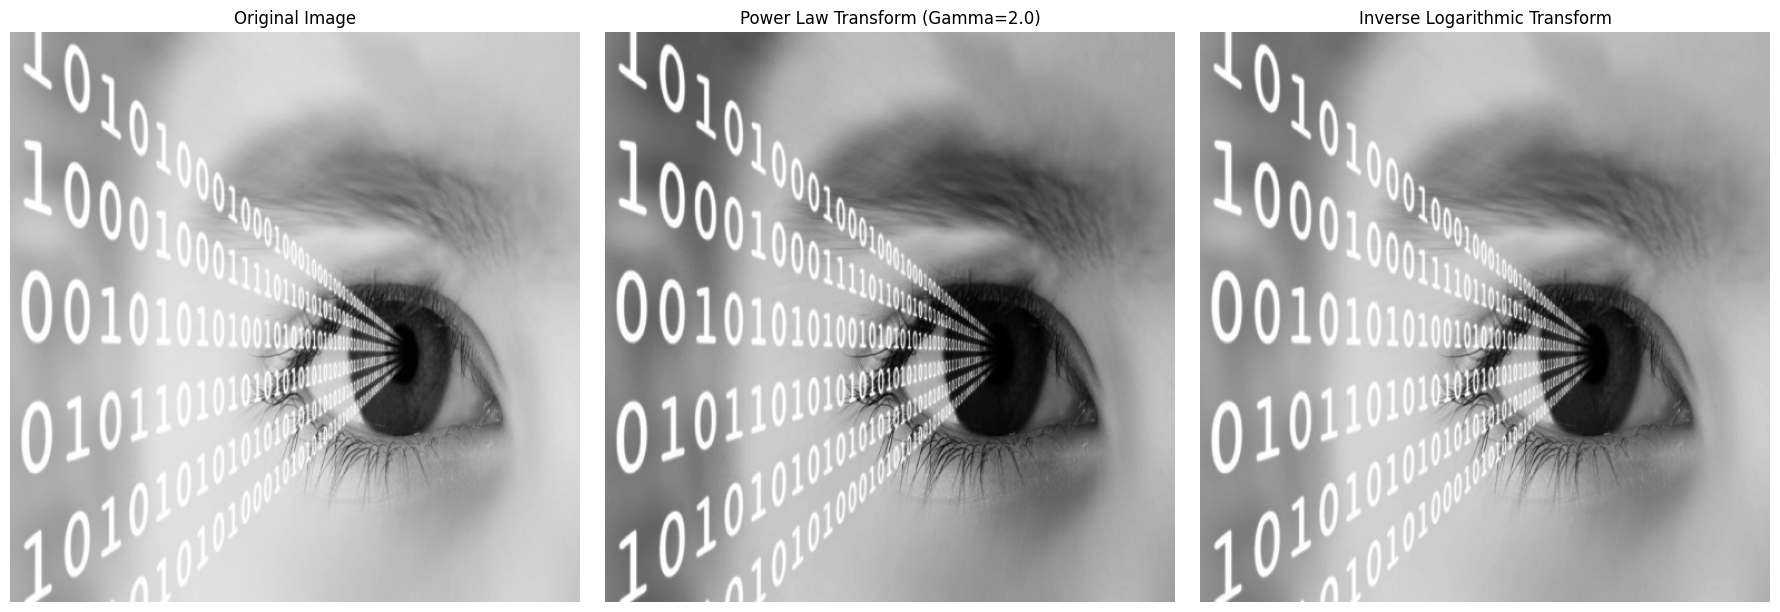

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def power_law_transform(image, gamma):
    
    normalized_image = image / 255.0  # Normalize to [0, 1]
    transformed_image = np.power(normalized_image, gamma) * 255
    return np.clip(transformed_image, 0, 255).astype(np.uint8)

def inverse_log_transform(image):
    
    normalized_image = image / 255.0  # Normalize to [0, 1]
    transformed_image = np.exp(normalized_image) - 1
    transformed_image = transformed_image / np.max(transformed_image) * 255
    return np.clip(transformed_image, 0, 255).astype(np.uint8)

# Load a 512x512 grayscale image
image_path = "img.jpg"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise ValueError("Could not load the image. Please check the file path.")

# Resize image if not 512x512
if original_image.shape != (512, 512):
    original_image = cv2.resize(original_image, (512, 512), interpolation=cv2.INTER_AREA)

# Apply transformations
gamma = 2.0  # Example gamma value for power law
power_law_image = power_law_transform(original_image, gamma)
inverse_log_image = inverse_log_transform(original_image)

# Display the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(power_law_image, cmap='gray')
plt.title(f'Power Law Transform (Gamma={gamma})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(inverse_log_image, cmap='gray')
plt.title('Inverse Logarithmic Transform')
plt.axis('off')

plt.tight_layout()
plt.show()
